In [238]:
# note for the data source
"""
Data downloaded from "https://www.cdc.gov/cancer/uscs/dataviz/download_data.htm"
USCS-1999-2017

US population = 326,072,594
(as of 12/31/2017)
https://www.census.gov/popclock/

This Data has a total of 383,848,110.
I have to assume that the difference is of the mixed race, but the number is the population of all US residents.

"""
# import modules

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns


In [239]:
# loading data from "cancer_1999-2017.csv" generated in "11.5-CapstoneTwo_DataCleaning.ipynb" 

data_19to17 = pd.read_csv("cancer_1999-2017.csv", index_col = False)


In [240]:
# extracing 2017 data for this analysis

data = data_19to17[data_19to17['YEAR'] == 2017]
data.head()

,Unnamed: 0,YEAR,SITE,RACE,SEX,COUNT,POPULATION
7719,7719,2017,Acute Lymphocytic,Asian/Pacific Islander,Female,24,10999800
7720,7720,2017,Acute Lymphocytic,Asian/Pacific Islander,Male,35,10130807
7721,7721,2017,Acute Lymphocytic,Black,Female,57,23807887
7722,7722,2017,Acute Lymphocytic,Black,Male,66,21980769
7723,7723,2017,Acute Lymphocytic,Hispanic,Female,150,29050132


In [241]:
# checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 7719 to 8175
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  457 non-null    int64 
 1   YEAR        457 non-null    int64 
 2   SITE        457 non-null    object
 3   RACE        457 non-null    object
 4   SEX         457 non-null    object
 5   COUNT       457 non-null    int64 
 6   POPULATION  457 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 28.6+ KB


In [242]:
# dropping columns no longer needed

del data["Unnamed: 0"]
del data["YEAR"]         
data.head()

,SITE,RACE,SEX,COUNT,POPULATION
7719,Acute Lymphocytic,Asian/Pacific Islander,Female,24,10999800
7720,Acute Lymphocytic,Asian/Pacific Islander,Male,35,10130807
7721,Acute Lymphocytic,Black,Female,57,23807887
7722,Acute Lymphocytic,Black,Male,66,21980769
7723,Acute Lymphocytic,Hispanic,Female,150,29050132


In [243]:
# calculate US population

us_population2017 = data['POPULATION'].sum()

# grouping data by 'SITE' and 'RACE' and aggregate 'COUNT' and 'POPULATION'

data.set_index('SITE')
df_race = data.groupby(['SITE', 'RACE']).sum(['COUNT', 'POPULATION']).reset_index()
df_race.head()

,SITE,RACE,COUNT,POPULATION
0,Acute Lymphocytic,Asian/Pacific Islander,59,21130607
1,Acute Lymphocytic,Black,123,45788656
2,Acute Lymphocytic,Hispanic,362,58700989
3,Acute Lymphocytic,White,1337,253543192
4,Acute Myeloid,American Indian/Alaska Native,43,4684666


In [244]:
# grouping data by 'SITE','RACE' and 'SEX', and aggregate 'COUNT' and 'POPULATION'

df_gender = data.groupby(['SITE', 'SEX','RACE']).sum(['COUNT', 'POPULATION']).reset_index()

In [245]:
df_gender.head()

,SITE,SEX,RACE,COUNT,POPULATION
0,Acute Lymphocytic,Female,Asian/Pacific Islander,24,10999800
1,Acute Lymphocytic,Female,Black,57,23807887
2,Acute Lymphocytic,Female,Hispanic,150,29050132
3,Acute Lymphocytic,Female,White,585,127878578
4,Acute Lymphocytic,Male,Asian/Pacific Islander,35,10130807


In [246]:
# calculate ration within the same race/gender group and US

df_gender['RATIO_GenderRace'] = (df_gender['COUNT'] / df_gender["POPULATION"]) * 1000
df_gender['RATIO_US'] = (df_gender['COUNT'] / us_population2017 * 100) * 1000
df_gender.head()
                                    


,SITE,SEX,RACE,COUNT,POPULATION,RATIO_GenderRace,RATIO_US
0,Acute Lymphocytic,Female,Asian/Pacific Islander,24,10999800,0.002182,0.000110
1,Acute Lymphocytic,Female,Black,57,23807887,0.002394,0.000261
2,Acute Lymphocytic,Female,Hispanic,150,29050132,0.005163,0.000687
3,Acute Lymphocytic,Female,White,585,127878578,0.004575,0.002680
4,Acute Lymphocytic,Male,Asian/Pacific Islander,35,10130807,0.003455,0.000160


In [247]:
# generate a list of Cancer Types ('SITE')

df_race3 = df_race[['SITE', 'RACE', 'COUNT']]
race = df_race3['RACE'].unique()


In [248]:
# filter df for the Top12 Cancer Types (SITE) within each RACE 

top12_race = [[df_race3[df_race3['RACE']== race[i]].sort_values('COUNT', ascending = False).head(12)] for i in range(len(race))]
top12_race

[[                                 SITE                    RACE  COUNT
  98                  Lung and Bronchus  Asian/Pacific Islander   3926
  30                   Colon and Rectum  Asian/Pacific Islander   1824
  93   Liver and Intrahepatic Bile Duct  Asian/Pacific Islander   1668
  187                          Pancreas  Asian/Pacific Islander   1424
  35             Colon excluding Rectum  Asian/Pacific Islander   1394
  56                      Female Breast  Asian/Pacific Islander   1365
  119                     Miscellaneous  Asian/Pacific Islander   1121
  230                           Stomach  Asian/Pacific Islander    966
  87                          Leukemias  Asian/Pacific Islander    683
  103                         Lymphomas  Asian/Pacific Islander    674
  133              Non-Hodgkin Lymphoma  Asian/Pacific Islander    652
  200                          Prostate  Asian/Pacific Islander    620],
 [                                 SITE   RACE  COUNT
  99                 

In [249]:
# group data for Top 12 Cancer Types ('SITE') for all races and sort in descending order
# previous Top 12 by race is referenced to see if Top 12 for all races are not too far off from the Top 12 for each race.

top12_cancer = df_race3.groupby('SITE').sum('COUNT').reset_index()

In [250]:
top12_cancer = top12_cancer.sort_values('COUNT', ascending = False).head(15)
top12_cancer.head(20)

,SITE,COUNT
24,Lung and Bronchus,151301
7,Colon and Rectum,56655
46,Pancreas,47079
29,Miscellaneous,45339
8,Colon excluding Rectum,45048
13,Female Breast,44983
50,Prostate,32497
23,Liver and Intrahepatic Bile Duct,30632
21,Leukemias,25288
25,Lymphomas,23169


* TOP 12 cancer list for all US and/or each ethnic groups are pretty much the same.
Therefore, I will be using the overall Top 12 cancer list to proceed with the analysis.

In [251]:
# there are a redundant columns like "Colon and Rectum" vs "Colon excluding Rectum", and a column like "Miscellaneous"
# those are excluded from the dataset

exclude_list = ['Miscellaneous', 'Female Breast, <i>in situ</i>', 'Oral Cavity and Pharynx', 'Colon excluding Rectum', 'Non-Hodgkin Lymphoma']

top12_cancer_list = top12_cancer['SITE']
top12_cancer_list = [i for i in top12_cancer_list if i not in exclude_list]

In [252]:
top12_cancer_list

['Lung and Bronchus',
 'Colon and Rectum',
 'Pancreas',
 'Female Breast',
 'Prostate',
 'Liver and Intrahepatic Bile Duct',
 'Leukemias',
 'Lymphomas',
 'Urinary Bladder',
 'Esophagus',
 'Ovary',
 'Kidney and Renal Pelvis']

In [253]:
# Top 12 cancer statistics by Cancer and Race in 2017

filter1 = df_race['SITE'].isin(top12_cancer_list)
df_2017 = df_race[filter1]

filter2 = df_gender['SITE'].isin(top12_cancer_list)
df_2017_gender = df_gender[filter2]



In [254]:
df_2017['RACE'].unique()

array(['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black',
       'Hispanic', 'White'], dtype=object)

In [255]:

dict_cancer = {'Lung and Bronchus' : 'Lung', 'Colon and Rectum' : 'Colon', 'Female Breast' : 'Breast', 
        'Liver and Intrahepatic Bile Duct' : 'Liver', 'Urinary Bladder' : 'Bladder', 'Kidney and Renal Pelvis' : 'Kidney'} 

dict_race = {}
  
# Remap the values of the dataframe 
df_2017.replace({"SITE": dict_cancer}, inplace = True) 
df_2017_gender.replace({"SITE": dict_cancer}, inplace = True) 

C:\Users\junko\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [256]:
# Ratio of cancer death is calculated by "# of cancer death devided by population for the race group"
# multiplied the result by 1,000 to make it easier to analyze

df_2017 = df_2017[['RACE', 'SITE', 'COUNT', 'POPULATION']].sort_values(['RACE', 'SITE'])
df_2017['RATIO'] = df_2017['COUNT'] / df_2017['POPULATION'] * 1000


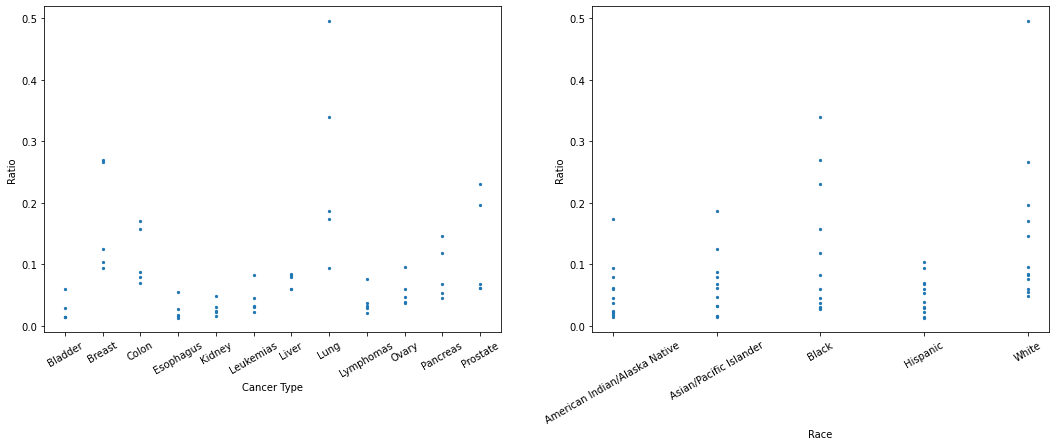

In [257]:
# plotted the ratio by the Cancer Type ('SITE') and RACE.

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
df_2017.plot.scatter(x = 'SITE', y = 'RATIO', marker = '.', ax = axes[0],subplots=True)
_ = plt.sca(axes[0])
_ = plt.xlabel('Cancer Type')
_ = plt.ylabel('Ratio')
_ = plt.xticks(rotation=30)


df_2017.plot.scatter(x = 'RACE', y = 'RATIO', marker = '.', ax = axes[1],subplots=True)
_ = plt.sca(axes[1])
_ = plt.xlabel('Race')
_ = plt.ylabel('Ratio')
_ = plt.xticks(rotation=30)

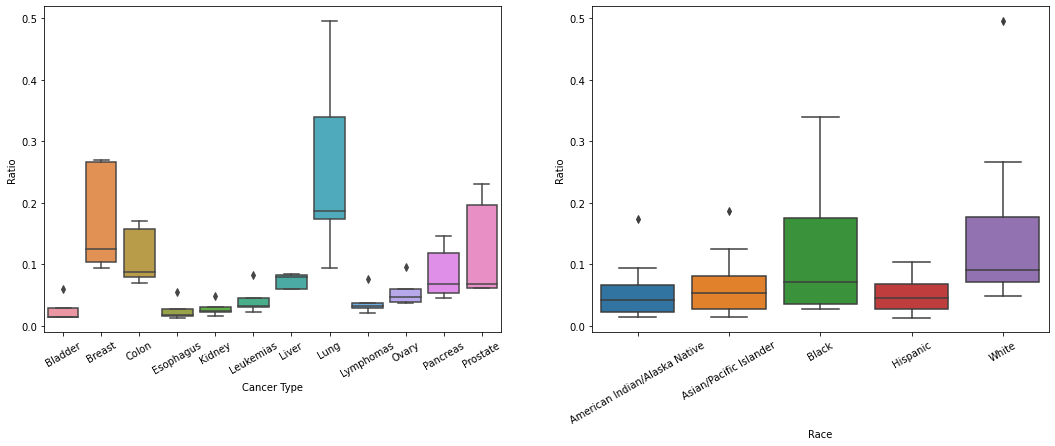

In [258]:
# creating boxplots (ratio by the Cancer Type ('SITE') and RACE) 
# for further analysis (including extent of data and outliers)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.boxplot(x = 'SITE', y = 'RATIO', data=df_2017, ax = axes[0])
_ = plt.sca(axes[0])
plt.xlabel('Cancer Type')
plt.ylabel('Ratio')
plt.xticks(rotation=30)

sns.boxplot(x = 'RACE', y = 'RATIO', data=df_2017, ax = axes[1])
_ = plt.sca(axes[1])
plt.xlabel('Race')
plt.ylabel('Ratio')
plt.xticks(rotation=30)

plt.show()



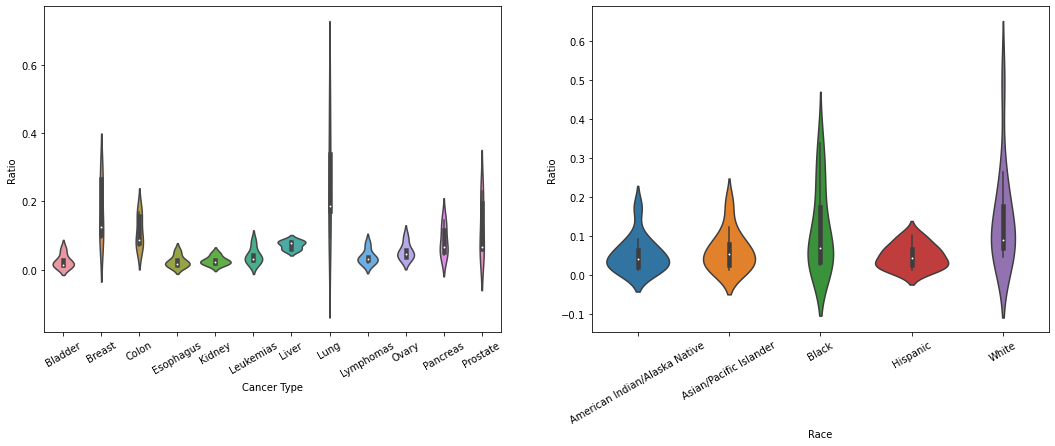

In [259]:
# creating violin plots (ratio by the Cancer Type ('SITE') and RACE) 
# for further analysis (including extent of data and density)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.violinplot(x = 'SITE', y = 'RATIO', data=df_2017, ax = axes[0])
_ = plt.sca(axes[0])
plt.xlabel('Cancer Type')
plt.ylabel('Ratio')
plt.xticks(rotation=30)

sns.violinplot(x = 'RACE', y = 'RATIO', data=df_2017, ax = axes[1])
_ = plt.sca(axes[1])
plt.xlabel('Race')
plt.ylabel('Ratio')
plt.xticks(rotation=30)

plt.show()

In [260]:
# creating a pivot to alter the chart horizonally for further analysis

df_pivot = df_2017.pivot(index = 'RACE', columns = 'SITE', values = 'RATIO')
df_pivot

SITE,Bladder,Breast,Colon,Esophagus,Kidney,Leukemias,Liver,Lung,Lymphomas,Ovary,Pancreas,Prostate
RACE,,,,,,,,,,,,
American Indian/Alaska Native,0.014089,0.094209,0.079195,0.017717,0.024121,0.022200,0.059769,0.173545,0.020919,0.036827,0.045041,0.061291
Asian/Pacific Islander,0.013771,0.124093,0.086320,0.015049,0.014813,0.032323,0.078938,0.185797,0.031897,0.045819,0.067390,0.061199
Black,0.027867,0.269953,0.157441,0.027605,0.030488,0.044159,0.082575,0.339342,0.036668,0.059014,0.117562,0.230429
Hispanic,0.013697,0.102685,0.069982,0.012981,0.021328,0.029999,0.060101,0.092877,0.028977,0.038107,0.052265,0.067823
White,0.059256,0.265783,0.170160,0.053861,0.047870,0.081714,0.084305,0.495269,0.075005,0.095387,0.145904,0.196213


In [261]:
df = df_pivot.reset_index()
df = df.set_index('RACE')
df


SITE,Bladder,Breast,Colon,Esophagus,Kidney,Leukemias,Liver,Lung,Lymphomas,Ovary,Pancreas,Prostate
RACE,,,,,,,,,,,,
American Indian/Alaska Native,0.014089,0.094209,0.079195,0.017717,0.024121,0.022200,0.059769,0.173545,0.020919,0.036827,0.045041,0.061291
Asian/Pacific Islander,0.013771,0.124093,0.086320,0.015049,0.014813,0.032323,0.078938,0.185797,0.031897,0.045819,0.067390,0.061199
Black,0.027867,0.269953,0.157441,0.027605,0.030488,0.044159,0.082575,0.339342,0.036668,0.059014,0.117562,0.230429
Hispanic,0.013697,0.102685,0.069982,0.012981,0.021328,0.029999,0.060101,0.092877,0.028977,0.038107,0.052265,0.067823
White,0.059256,0.265783,0.170160,0.053861,0.047870,0.081714,0.084305,0.495269,0.075005,0.095387,0.145904,0.196213


In [262]:
#df_pivot_gender = df_2017_gender.pivot(index = ['RACE', 'SEX'], columns = 'SITE', values = 'RATIO_USPop')
df_pivot_gender = df_2017_gender.pivot(index = ['RACE', 'SEX'], columns = 'SITE', values = 'RATIO_GenderRace')
df_pivot_gender

SITE                                   Bladder    Breast     Colon  Esophagus  \
RACE                          SEX                                               
American Indian/Alaska Native Female  0.007708  0.094209  0.068516   0.008564   
                              Male    0.020430       NaN  0.089809   0.026815   
Asian/Pacific Islander        Female  0.008455  0.124093  0.077365   0.006546   
                              Male    0.019544       NaN  0.096044   0.024282   
Black                         Female  0.022052  0.269953  0.143104   0.016003   
                              Male    0.034166       NaN  0.172969   0.040171   
Hispanic                      Female  0.008984  0.102685  0.062203   0.004923   
                              Male    0.018313       NaN  0.077603   0.020876   
White                         Female  0.032320  0.265783  0.158995   0.019816   
                              Male    0.086667       NaN  0.181523   0.088505   

SITE                                    Kidney  Leukemias     Liver      Lung  \
RACE                          SEX                                               
American Indian/Alaska Native Female  0.016273   0.019270  0.037684  0.161869   
                              Male    0.031923   0.025112  0.081722  0.185151   
Asian/Pacific Islander        Female  0.010455   0.024546  0.051728  0.153912   
                              Male    0.019544   0.040767  0.108481  0.220417   
Black                         Female  0.021211   0.040827  0.049101  0.281965   
                              Male    0.040535   0.047769  0.118831  0.401487   
Hispanic                      Female  0.015456   0.026781  0.041170  0.078141   
                              Male    0.027082   0.033152  0.078649  0.107316   
White                         Female  0.033352   0.067423  0.055005  0.456456   
                              Male    0.062643   0.096256  0.114121  0.534765   

SITE                                  Lymphomas     Ovary  Pancreas  Prostate  
RACE                          SEX                                              
American Indian/Alaska Native Female   0.020127  0.036827  0.041110       NaN  
                              Male     0.021707       NaN  0.048948  0.061291  
Asian/Pacific Islander        Female   0.025000  0.045819  0.067910       NaN  
                              Male     0.039385       NaN  0.066826  0.061199  
Black                         Female   0.030452  0.059014  0.116810       NaN  
                              Male     0.043402       NaN  0.118376  0.230429  
Hispanic                      Female   0.026609  0.038107  0.054010       NaN  
                              Male     0.031298       NaN  0.050555  0.067823  
White                         Female   0.064162  0.095387  0.136598       NaN  
                              Male     0.086039       NaN  0.155374  0.196213

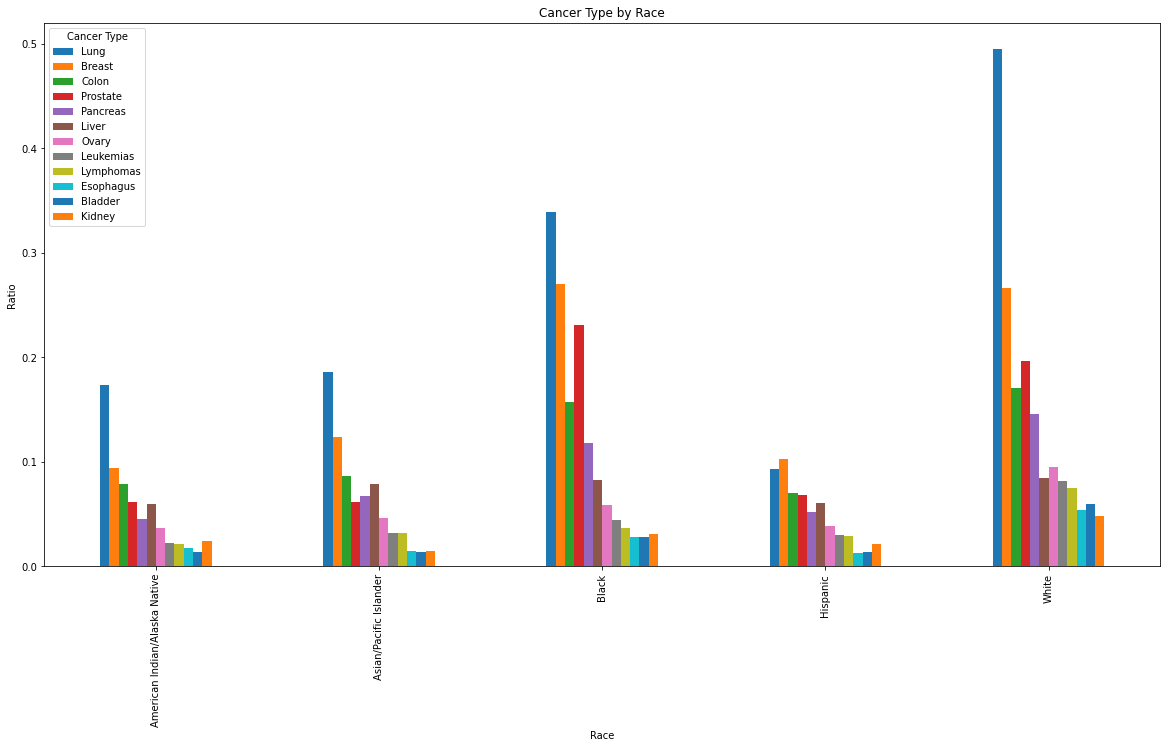

In [263]:
# changing the order of data to make it easier to see
# charting the ratio of Top 12 cancer types in each race group

df[['Lung', 'Breast', 'Colon','Prostate', 'Pancreas', 'Liver', 'Ovary', 'Leukemias', 'Lymphomas', 'Esophagus','Bladder', 'Kidney']].plot(kind='bar', figsize=(20,10))
plt.legend(title="Cancer Type", loc = 2)
_ = plt.xlabel("Race")
_ = plt.ylabel('Ratio')
_ = plt.title('Cancer Type by Race')
plt.show()

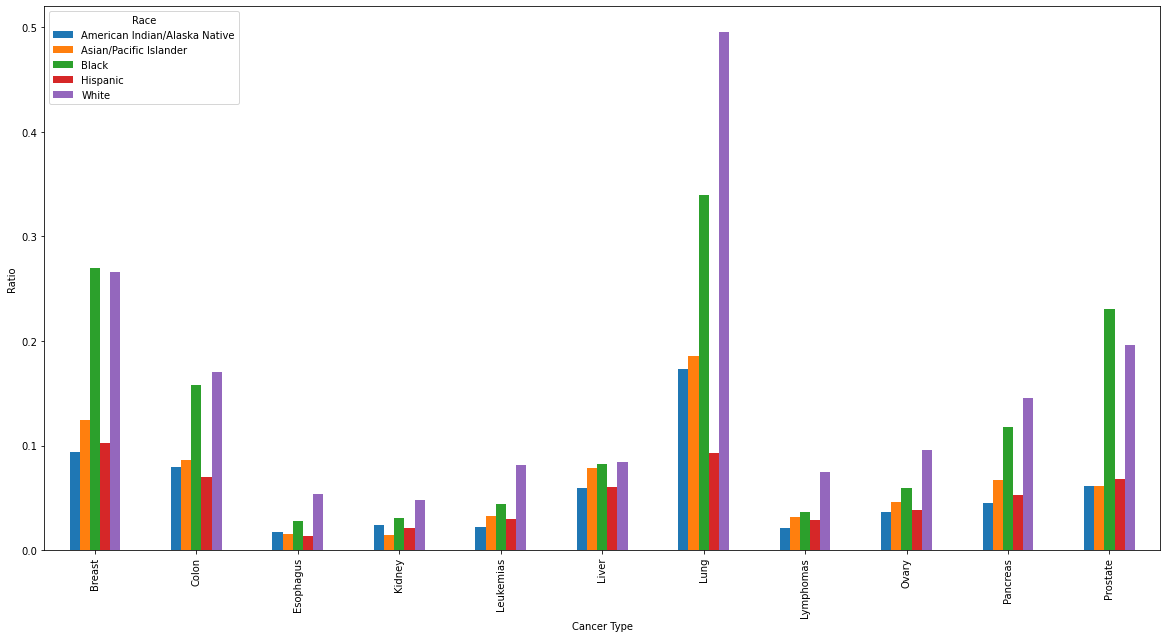

In [264]:
# change df format to be able to create the equivalent chart by cancer type

df2 = df.T
df2 = df2.reset_index('SITE')



df2.rename(columns = {'SITE':'CancerType', 0:'American Indian/Alaska Native',1:'Asian/Pacific Islander',2:'Black',3:'Hispanic',4:'White'}, inplace = True)
df2 = df2.drop(0)
df2 = df2.set_index('CancerType')


# charting the ratio of the race group in each Top 12 cancer types

df2[['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black', 'Hispanic', 'White']].plot(kind = 'bar', figsize=(20,10))
plt.legend(title="Race", loc = 2)
_ = plt.xlabel("Cancer Type")
_ = plt.ylabel('Ratio')
plt.show()

In [265]:
df_gender2 = df_pivot_gender.reset_index()
df_gender2 = df_gender2.set_index(['RACE','SEX'])

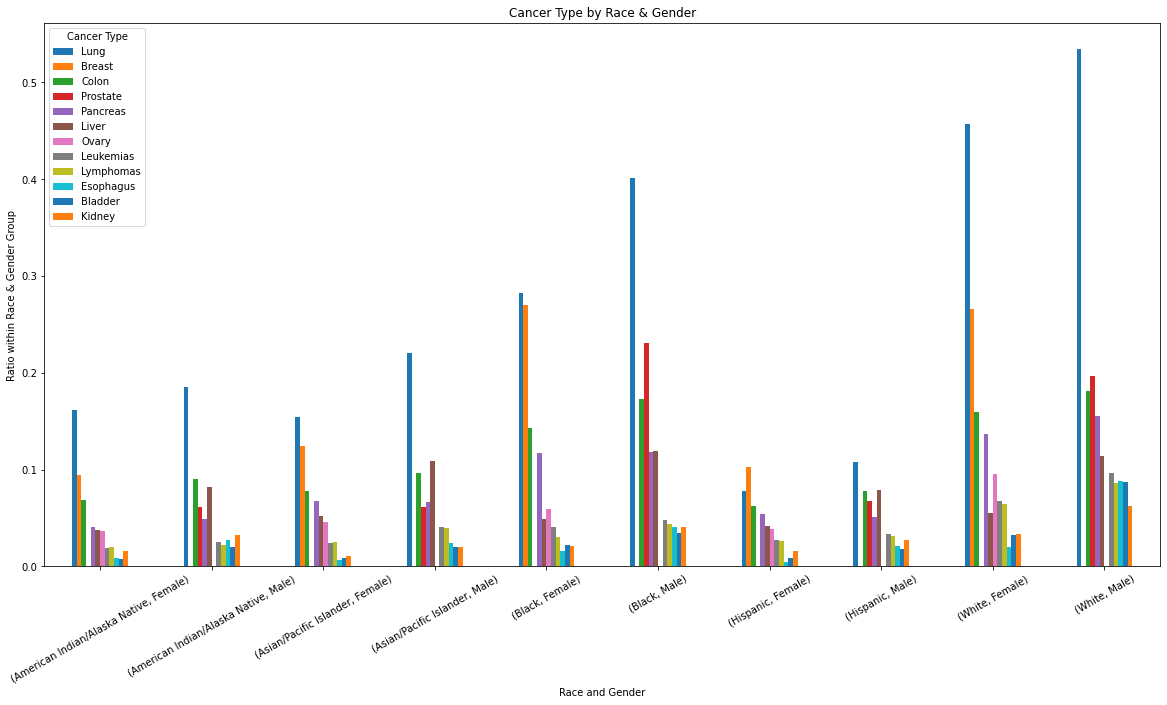

In [266]:
df_gender2[['Lung', 'Breast', 'Colon','Prostate', 'Pancreas', 'Liver', 'Ovary', 'Leukemias', 'Lymphomas', 'Esophagus','Bladder', 'Kidney']].plot(kind='bar', figsize=(20,10))
plt.legend(title="Cancer Type", loc = 2)
_ = plt.xlabel("Race and Gender")
_ = plt.xticks(rotation = 30)
_ = plt.ylabel('Ratio within Race & Gender Group')
_ = plt.title('Cancer Type by Race & Gender')
plt.show()

<AxesSubplot:xlabel='SITE', ylabel='SITE'>

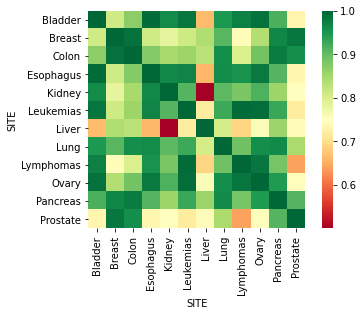

In [267]:
# heatmap to show if there is any correlation

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [269]:
df_dummies = pd.get_dummies(df_2017_gender)
df_dummies.head()

,COUNT,POPULATION,RATIO_GenderRace,RATIO_US,SITE_Bladder,SITE_Breast,SITE_Colon,SITE_Esophagus,SITE_Kidney,SITE_Leukemias,...,SITE_Ovary,SITE_Pancreas,SITE_Prostate,SEX_Female,SEX_Male,RACE_American Indian/Alaska Native,RACE_Asian/Pacific Islander,RACE_Black,RACE_Hispanic,RACE_White
51,160,2335226,0.068516,0.000733,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
52,851,10999800,0.077365,0.003899,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
53,3407,23807887,0.143104,0.015608,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
54,1807,29050132,0.062203,0.008278,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
55,20332,127878578,0.158995,0.093146,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# Unit16.3 - Training Data

To perform Machine Learning, my data for only 2017 was too aggregated that I couldn't find good value to predict.  So, I used the original data that contains data from 1999 to 2017 for this portion of the project.

In [270]:
#imported modules for StandardScaler and train_test_split from sklearn.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [271]:
# checking data

data_19to17.head()

,Unnamed: 0,YEAR,SITE,RACE,SEX,COUNT,POPULATION
0,0,1999,Acute Lymphocytic,Asian/Pacific Islander,Female,16,5875446
1,1,1999,Acute Lymphocytic,Black,Female,51,18978030
2,2,1999,Acute Lymphocytic,Black,Male,81,17195091
3,3,1999,Acute Lymphocytic,Hispanic,Female,96,16499783
4,4,1999,Acute Lymphocytic,Hispanic,Male,117,17434346


In [272]:
# drop unwanted columns 

del data_19to17["Unnamed: 0"]
data_19to17.head()

,YEAR,SITE,RACE,SEX,COUNT,POPULATION
0,1999,Acute Lymphocytic,Asian/Pacific Islander,Female,16,5875446
1,1999,Acute Lymphocytic,Black,Female,51,18978030
2,1999,Acute Lymphocytic,Black,Male,81,17195091
3,1999,Acute Lymphocytic,Hispanic,Female,96,16499783
4,1999,Acute Lymphocytic,Hispanic,Male,117,17434346


In [273]:
# filter data for Top 12 cancer types

filter3 = data_19to17['SITE'].isin(top12_cancer_list)
data_19to17.replace({"SITE": dict_cancer}, inplace = True) 
data_prep = data_19to17[filter3]

In [274]:
data_prep.head()

,YEAR,SITE,RACE,SEX,COUNT,POPULATION
45,1999,Colon,American Indian/Alaska Native,Female,84,1421980
46,1999,Colon,American Indian/Alaska Native,Male,88,1410781
47,1999,Colon,Asian/Pacific Islander,Female,414,5875446
48,1999,Colon,Asian/Pacific Islander,Male,419,5538405
49,1999,Colon,Black,Female,3577,18978030


In [275]:
# run pd.get_dummies to convert categorical variable into indicator variables

data = pd.get_dummies(data_prep)

In [276]:
print(data.shape)
print(data.head())

(1967, 22)
    YEAR  COUNT  POPULATION  SITE_Bladder  SITE_Breast  SITE_Colon  \
45  1999     84     1421980             0            0           1   
46  1999     88     1410781             0            0           1   
47  1999    414     5875446             0            0           1   
48  1999    419     5538405             0            0           1   
49  1999   3577    18978030             0            0           1   

    SITE_Esophagus  SITE_Kidney  SITE_Leukemias  SITE_Liver  ...  SITE_Ovary  \
45               0            0               0           0  ...           0   
46               0            0               0           0  ...           0   
47               0            0               0           0  ...           0   
48               0            0               0           0  ...           0   
49               0            0               0           0  ...           0   

    SITE_Pancreas  SITE_Prostate  RACE_American Indian/Alaska Native  \
45             

In [277]:
# set X and y for applying models

X = data.drop(['YEAR', 'COUNT'], axis = 1)
y = data['COUNT']

In [278]:
# split data into 80% training and 20% testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [279]:
print(y_train[:5])

2180       32
2609       32
2637     1609
1377    10868
4779       44
Name: COUNT, dtype: int64


In [280]:
# apply StandardScaler

sc_y = StandardScaler()

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [281]:
y_train[:5]

array([[-0.3997415 ],
       [-0.3997415 ],
       [-0.26018745],
       [ 0.55917269],
       [-0.39867958]])

In [282]:
y_test[:5]

array([[ 0.28236542],
       [-0.26027594],
       [-0.39965301],
       [-0.39885657],
       [-0.39885657]])